Données d'entraînement : X_train shape = (698, 64, 64, 3), y_train shape = (698,)
Données de test : X_test shape = (104, 64, 64, 3), y_test shape = (104,)
Nombre d'images d'entraînement : 698
Nombre d'images de test : 104
Taille des images (entraînement) : (64, 64, 3)
Taille des labels (entraînement) : (2,)


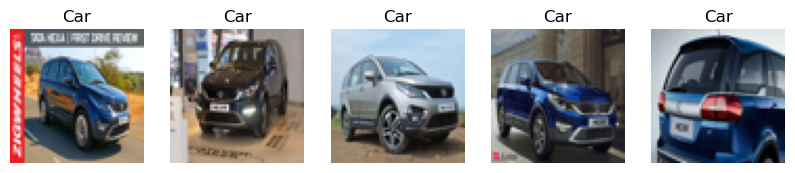

Taille d'entrée du CNN : (64, 64, 3)
Taille de sortie du CNN : (2,)
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 64, 64, 4)         112       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 16)        592       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                   

KeyboardInterrupt: 

In [11]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

# Fonction pour charger les données depuis les sous-dossiers car et bike
def load_data(data_dir):
    images = []
    labels = []
    for label in ["car", "bike"]:  # Les deux classes à charger
        class_dir = os.path.join(data_dir, label)
        if os.path.isdir(class_dir):
            for file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, file)
                try:
                    # Charger l'image, convertir en RGB et redimensionner
                    img = Image.open(img_path).convert('RGB').resize((64, 64))
                    images.append(np.array(img))  # Ajouter l'image au tableau
                    labels.append(label)  # Ajouter le label correspondant (car ou bike)
                except Exception as e:
                    print(f"Erreur avec le fichier {img_path}: {e}")

    # Retourner les données sous forme de tableaux numpy
    return np.array(images, dtype=np.float32), np.array(labels)

# Chemins vers les dossiers d'entraînement et de test
train_data_dir = "data"       # Dossier contenant les données d'entraînement
test_data_dir = "test_data"   # Dossier contenant les données de test

# Charger les données d'entraînement et de test
X_train, y_train = load_data(train_data_dir)
X_test, y_test = load_data(test_data_dir)

# Vérification des dimensions des données
print(f"Données d'entraînement : X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Données de test : X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")

# Normalisation des images (pixels entre 0 et 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Conversion des labels au format one-hot (2, 1)
def convert_labels_to_one_hot(labels):
    one_hot_labels = []
    for label in labels:
        if label == "car":
            one_hot_labels.append([1, 0])  # car
        elif label == "bike":
            one_hot_labels.append([0, 1])  # bike
    return np.array(one_hot_labels)

y_train_one_hot = convert_labels_to_one_hot(y_train)
y_test_one_hot = convert_labels_to_one_hot(y_test)

# Affichage des dimensions des données
print(f"Nombre d'images d'entraînement : {X_train.shape[0]}")
print(f"Nombre d'images de test : {X_test.shape[0]}")
print(f"Taille des images (entraînement) : {X_train.shape[1:]}")
print(f"Taille des labels (entraînement) : {y_train_one_hot.shape[1:]}")

# Affichage de quelques exemples d'images avec leurs labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i])
    label = "Car" if y_train_one_hot[i][0] == 1 else "Bike"
    plt.title(label)
    plt.axis("off")
plt.show()


# Dimensions d'entrée et de sortie pour le CNN
input_shape = X_train.shape[1:]  # (64, 64, 3)
output_shape = y_train_one_hot.shape[1:]  # (1, 2)

print(f"Taille d'entrée du CNN : {input_shape}")
print(f"Taille de sortie du CNN : {output_shape}")



# Création du réseau de neurone convolutif (CNN)
# 1. Créer un modèle séquentiel
cnn_model = Sequential()

# 2. Couche de convolution (kernel=3, taille de sortie=4, padding='same', activation=ReLU)
cnn_model.add(Conv2D(filters=4, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))

# 3. Couche de MaxPooling (taille=2, pas=2)
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# Taille de sortie après cette couche : (64 / 2 = 32, 64 / 2 = 32, 4)

# 4 Deuxième couche de convolution (kernel=3, taille de sortie=16, padding='same', activation=ReLU)
cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
# Taille de sortie après cette couche : (32, 32, 16)

# 5. Deuxième couche de MaxPooling (taille=2, pas=2)
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# Taille de sortie après cette couche : (32 / 2 = 16, 32 / 2 = 16, 16)

# 6. Troisième couche de convolution (kernel=3, taille de sortie=32, padding='same', activation=ReLU)
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
# Taille de sortie après cette couche : (16, 16, 32)

# 7. Troisième couche de MaxPooling (taille=2, pas=2)
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# Taille de sortie après cette couche : (16 / 2 = 8, 16 / 2 = 8, 32)

# 8. Couche de Flatten (conversion en vecteur 1D)
cnn_model.add(Flatten())
# Taille de sortie après cette couche : (8 * 8 * 32 = 2048)

# 9. Couche dense de sortie avec activation softmax (taille=2 pour 2 classes)
cnn_model.add(Dense(units=2, activation='softmax'))

# 10. Générer un schéma du modèle
plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# 11. Résumé du modèle
cnn_model.summary()


#ENtrainement du CNN
# La loss adapté est 'categorical_crossentropy'
# Justification: Cette fonction est adaptée pour des problèmes de classification multi-classes ou binaire avec des labels encodés au format one-hot, car elle pénalise plus fortement les prédictions incorrectes.

#Compilation du modèle
cnn_model.compile(optimizer=Adam(learning_rate=0.001),  # Optimiseur Adam
                  loss='categorical_crossentropy',     # Perte catégorielle
                  metrics=['accuracy'])               # Suivi de la précision

# Entraînement du modèle
history = cnn_model.fit(X_train, y_train_one_hot,
                        validation_data=(X_test, y_test_one_hot),
                        epochs=50,
                        batch_size=32,
                        verbose=1)


# Courbes d'entraînement
plt.figure(figsize=(12, 6))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte - Entraînement')
plt.plot(history.history['val_loss'], label='Perte - Validation')
plt.title('Évolution de la perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()

# Courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy - Entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy - Validation')
plt.title('Évolution de l’accuracy')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#Le modèle ne converge pas
# Évaluation sur les données de test
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test_one_hot, verbose=1)

# Afficher les résultats
print(f"Perte sur le jeu de test : {test_loss:.4f}")
print(f"Accuracy sur le jeu de test : {test_accuracy:.4f}")

